C:\Users\Mathiako\AppData\Local\Temp\ipykernel_18972\512156432.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


The dataset ranges from 2022-03-15 07:25:05 to 2022-05-30 09:37:21


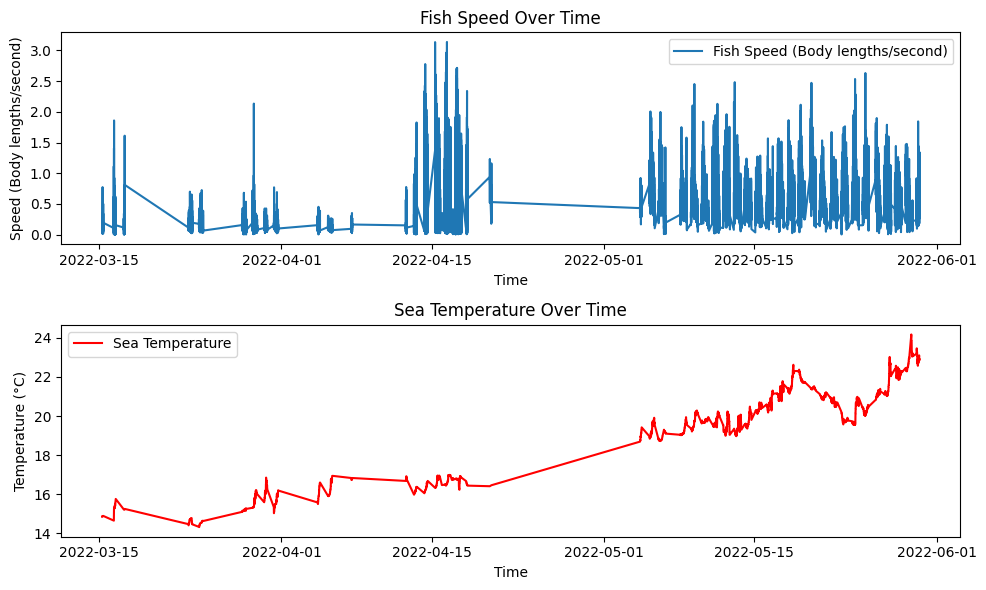

In [144]:
#Seabass data from Nikos
import pandas as pd
import matplotlib.pyplot as plt

#File path
csv_file_path = r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv'


df = pd.read_csv(
    csv_file_path, 
    sep=';', 
    decimal=',',
    parse_dates=['observed At:'],
    dayfirst=False,
    index_col='observed At:'
)

min_date = df.index.min()
max_date = df.index.max()
print(f"The dataset ranges from {min_date} to {max_date}")


df.columns = df.columns.str.strip()

df['fish Speed (Body lengths/second)'] = pd.to_numeric(
    df['fish Speed (Body lengths/second)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)
df['temperature'] = pd.to_numeric(
    df['temperature'].astype(str).str.replace(',', '.'),
    errors='coerce'
)


plt.figure(figsize=(10, 6))

#Fish speed plot
plt.subplot(2, 1, 1) 
plt.plot(df.index, df['fish Speed (Body lengths/second)'], label='Fish Speed (Body lengths/second)')
plt.title('Fish Speed Over Time')
plt.ylabel('Speed (Body lengths/second)')
plt.xlabel('Time')
plt.legend()

#Temperature plot
plt.subplot(2, 1, 2)  
plt.plot(df.index, df['temperature'], label='Sea Temperature', color='red')
plt.title('Sea Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Mathiako\AppData\Local\Temp\ipykernel_18972\2591608435.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


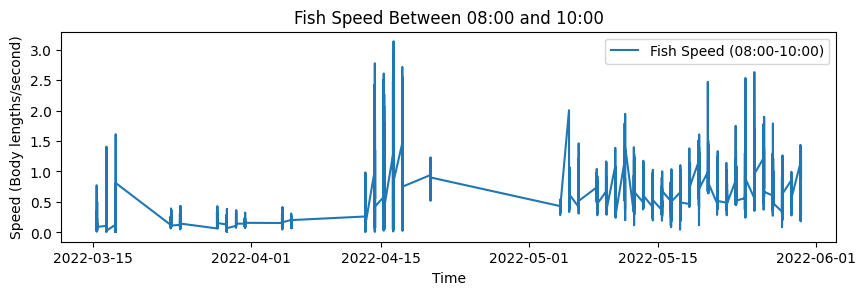

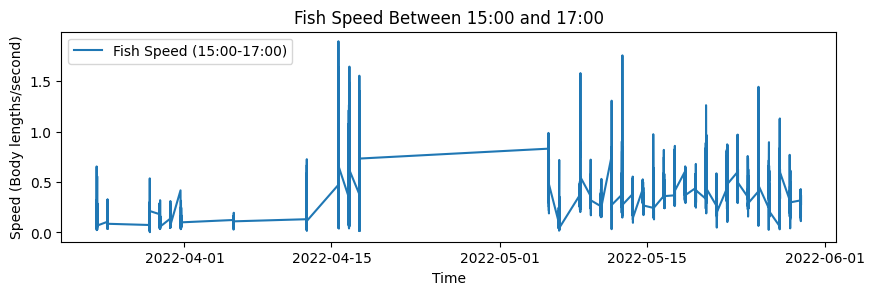

The average fish speed between 08:00 and 10:00 is: 0.71 body lengths/second
The average fish speed between 11:00 and 13:00 is: 0.48 body lengths/second
The average fish speed between 15:00 and 17:00 is: 0.45 body lengths/second
The average fish speed between 00:00 and 02:00 is: 0.48 body lengths/second


In [145]:
#Nikos data, average fish speed between daytime intervals

import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv'

df = pd.read_csv(
    csv_file_path, 
    sep=';', 
    decimal=',',
    parse_dates=['observed At:'],
    dayfirst=False,
    index_col='observed At:'
)

df.columns = df.columns.str.strip()

df['fish Speed (Body lengths/second)'] = pd.to_numeric(
    df['fish Speed (Body lengths/second)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

morning_df = df.between_time('08:00', '10:00')

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(morning_df.index, morning_df['fish Speed (Body lengths/second)'], label='Fish Speed (08:00-10:00)')
plt.title('Fish Speed Between 08:00 and 10:00')
plt.xlabel('Time')
plt.ylabel('Speed (Body lengths/second)')
plt.legend()
plt.show()

afternoon_df = df.between_time('15:00', '17:00')

#Plot the fish speed for the filtered time period
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(afternoon_df.index, afternoon_df['fish Speed (Body lengths/second)'], label='Fish Speed (15:00-17:00)')
plt.title('Fish Speed Between 15:00 and 17:00')
plt.xlabel('Time')
plt.ylabel('Speed (Body lengths/second)')
plt.legend()
plt.show()

noon_df = df.between_time('11:00', '13:00')
night_df = df.between_time('00:00', '02:00')

#Calculate the average fish speed during this time period
average_speed2 = morning_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 08:00 and 10:00 is: {average_speed2:.2f} body lengths/second")

average_speed3 = noon_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 11:00 and 13:00 is: {average_speed3:.2f} body lengths/second")


average_speed = afternoon_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 15:00 and 17:00 is: {average_speed:.2f} body lengths/second")

average_speed4 = noon_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 00:00 and 02:00 is: {average_speed4:.2f} body lengths/second")


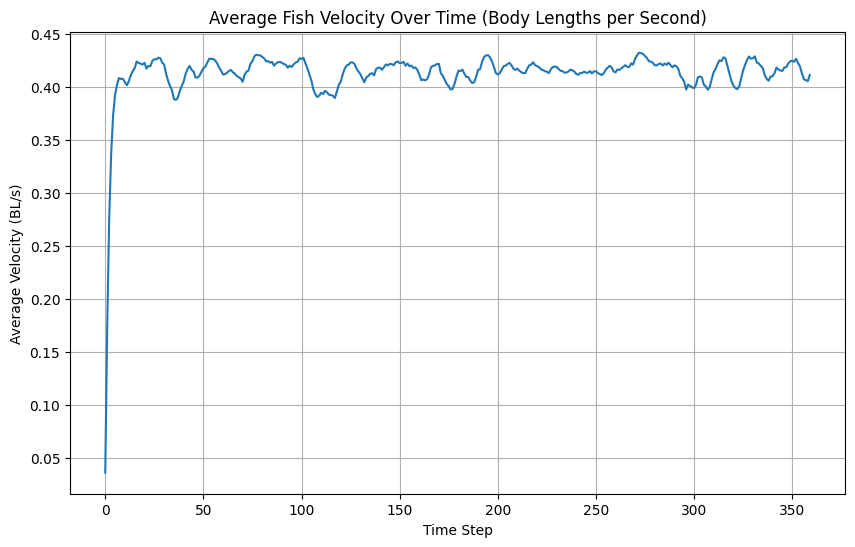

In [151]:
#Model data, average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test2.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

#Skip the first 10 time steps
#average_velocity_per_step_bl_s = average_velocity_per_step_bl_s.iloc[10:]

plt.figure(figsize=(10, 6))
average_velocity_per_step_bl_s.plot()
plt.title('Average Fish Velocity Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (BL/s)')
plt.grid(True)
plt.show()


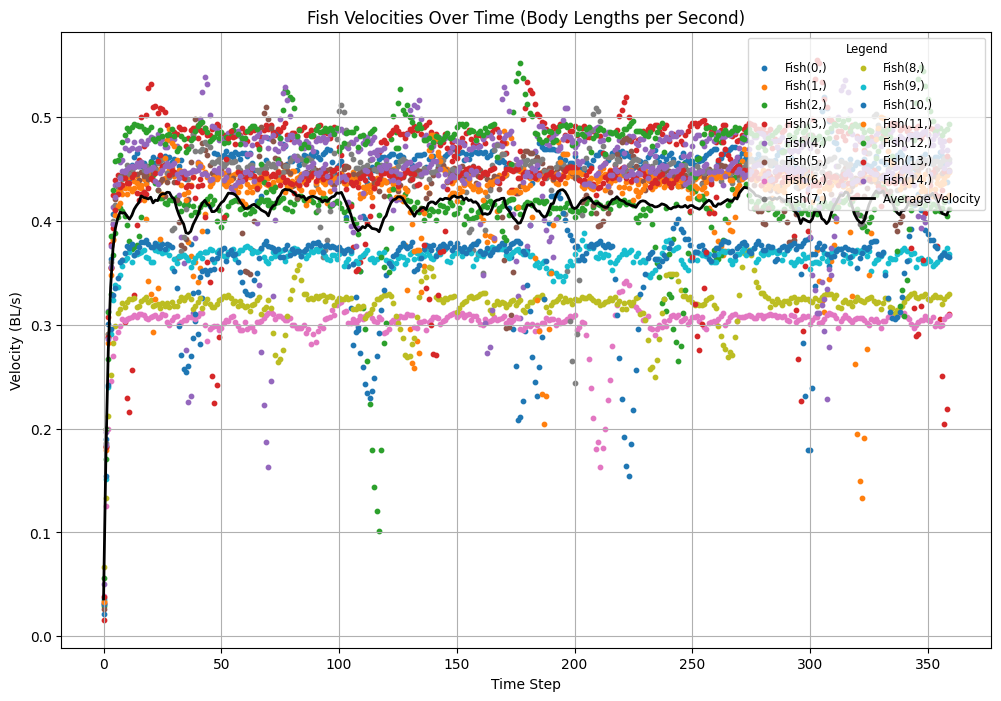

In [152]:
#Model data, induvidual and average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test2.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()



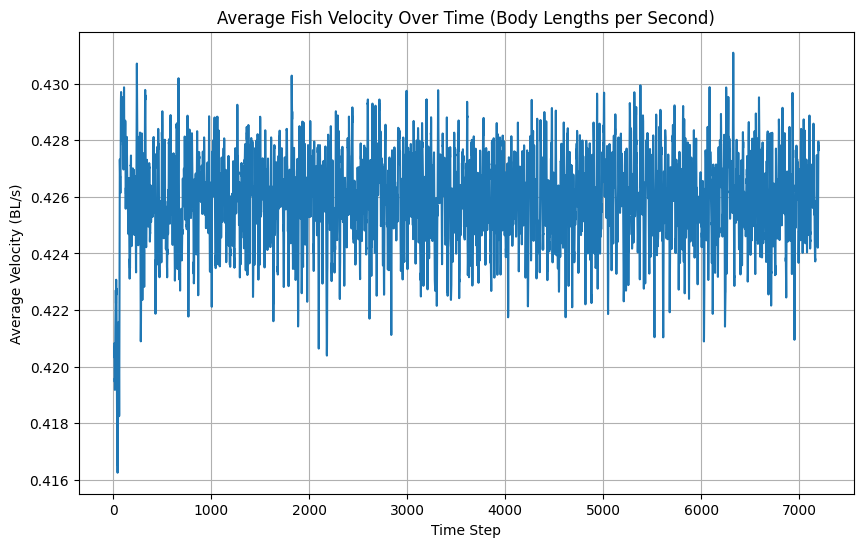

In [149]:
#Model data, average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test1.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

#Skip the first 10 time steps
average_velocity_per_step_bl_s = average_velocity_per_step_bl_s.iloc[10:]

plt.figure(figsize=(10, 6))
average_velocity_per_step_bl_s.plot()
plt.title('Average Fish Velocity Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (BL/s)')
plt.grid(True)
plt.show()



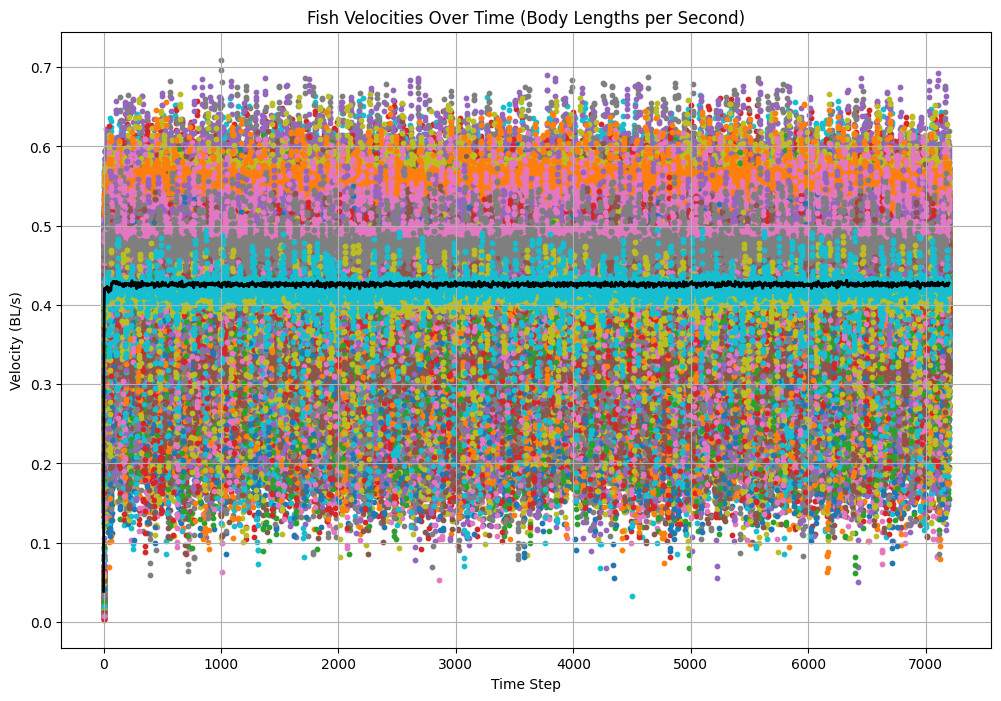

In [139]:
#Model data, induvidual and average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test1.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
#plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()



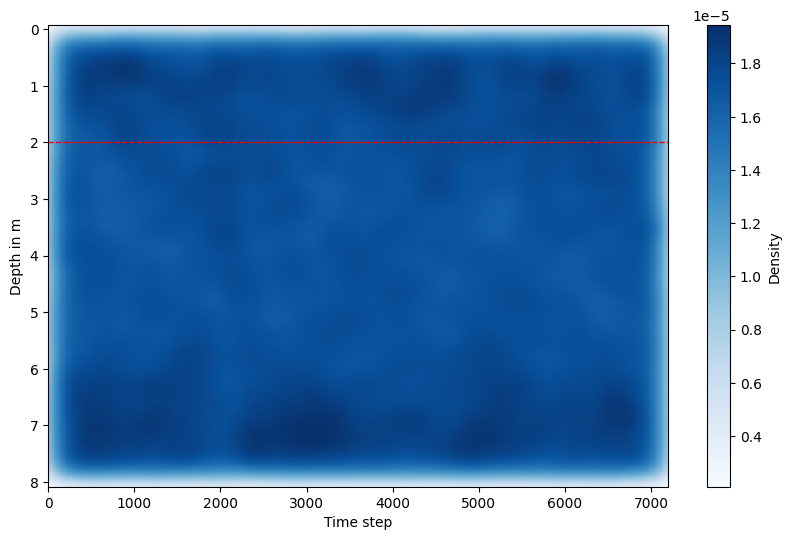

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test1.csv')

nbins = 100  #The number of bins for the KDE, affecting smoothness of the density plot

depth = fish_data['pos_z']
time_steps = fish_data['time_step']

fig, ax = plt.subplots(figsize=(10, 6))

#Calculate the Gaussian KDE
k = stats.gaussian_kde([time_steps, depth])
xi, yi = np.mgrid[time_steps.min():time_steps.max():nbins*1j, depth.min():depth.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


cax = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Blues)
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Density')

ax.invert_yaxis()

# Set axis labels
ax.set_xlabel('Time step')
ax.set_ylabel('Depth in m')

ax.hlines(y=2, xmin=time_steps.min(), xmax=time_steps.max(), linewidth=1, color='r', linestyle='--')

plt.show()
